In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("penguins.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(inplace= True)

In [7]:
df.isna().sum().sum()

0

In [9]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df = df[df["sex"] != "."]

In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [12]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [13]:
X = pd.get_dummies(df.drop("species", axis=1))

In [15]:
X[:2]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False


In [16]:
y = df["species"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
test_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test, test_pred)

array([[43,  3,  0],
       [ 0, 23,  0],
       [ 0,  0, 31]], dtype=int64)

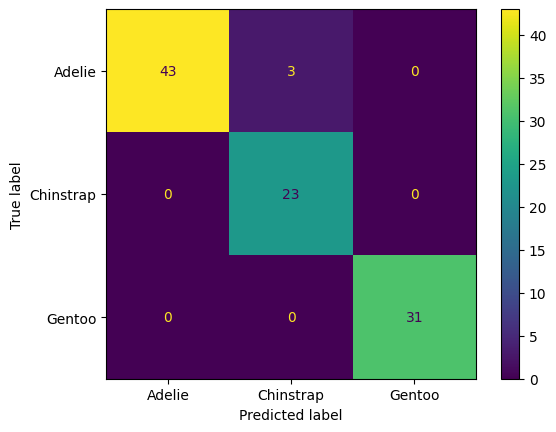

In [29]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [30]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.88      1.00      0.94        23
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



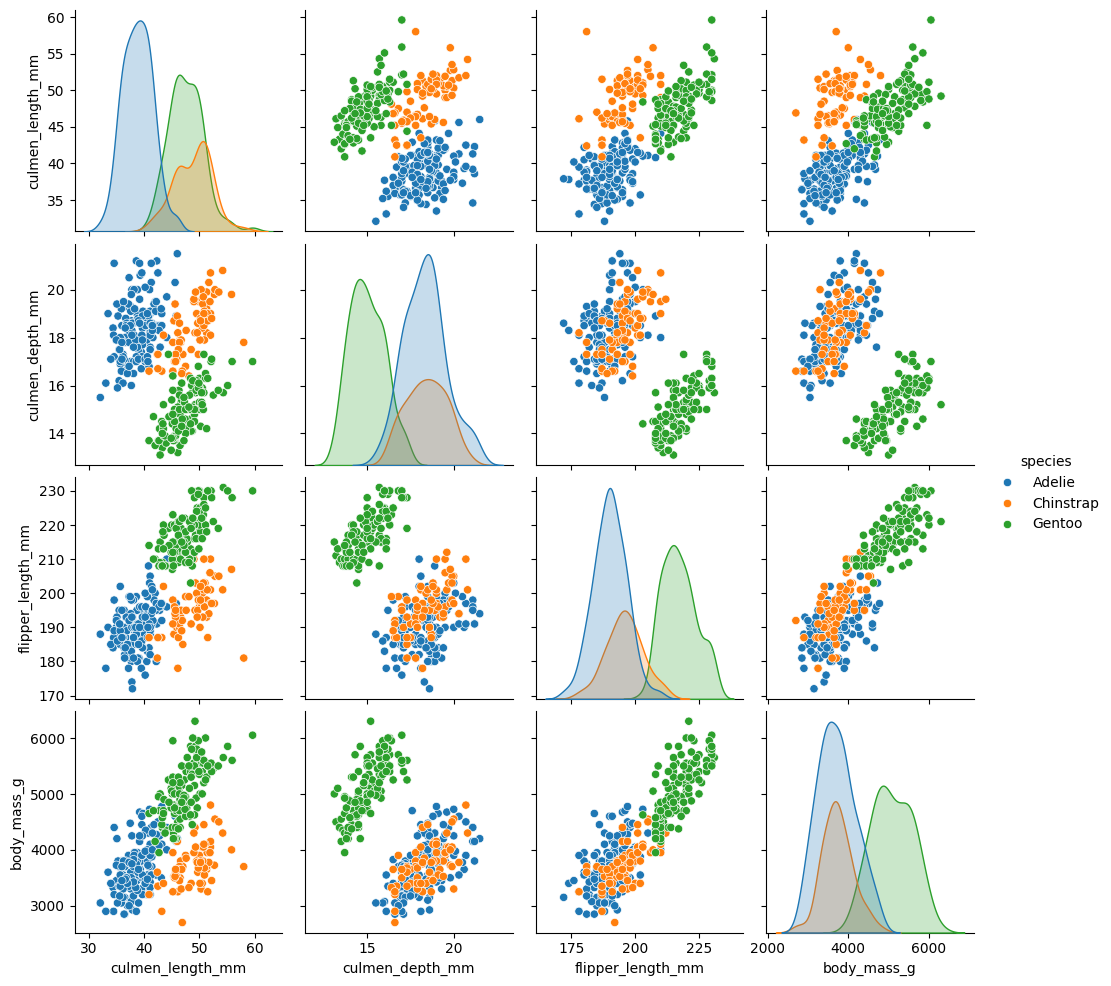

In [31]:
sns.pairplot(data=df, hue="species")

In [32]:
from sklearn.tree import plot_tree

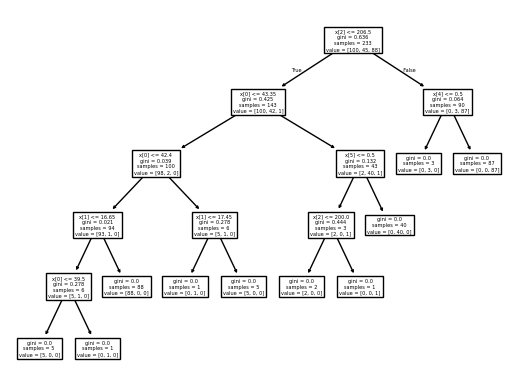

In [34]:
plot_tree(model);

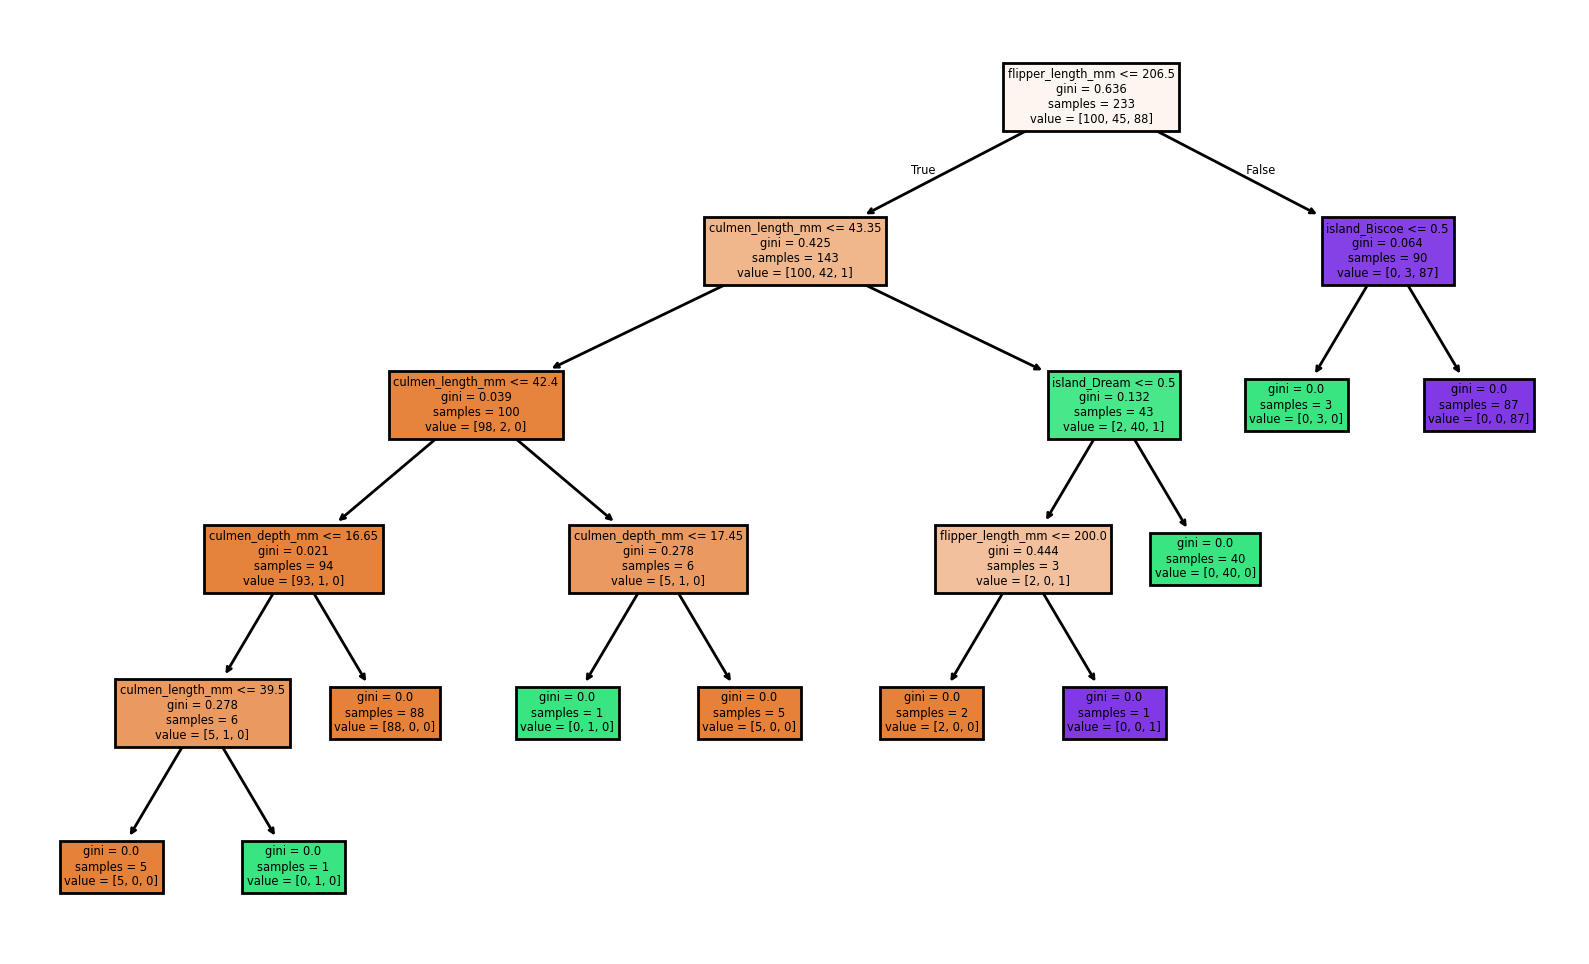

In [38]:
plt.figure(figsize=(10,6), dpi=200)
plot_tree(model, filled= True, feature_names=X.columns);

In [40]:
# Fonksiyon oluşturalım istediğimiz zaman nasıl bir ağaç modeli istiyorsak onun içine verelim riek görmek istediklerimizi getirsin

def model_sonuc(model):
    pengu_pred = model.predict(X_test)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(pengu_pred, y_test), "\n")

    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model, filled= True, feature_names=X.columns);


              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.97        43
   Chinstrap       1.00      0.92      0.96        25
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100
 



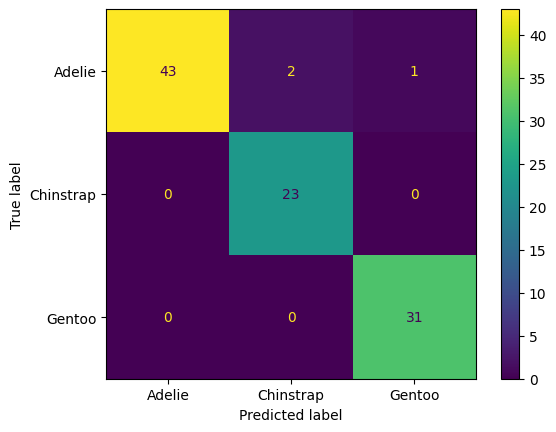

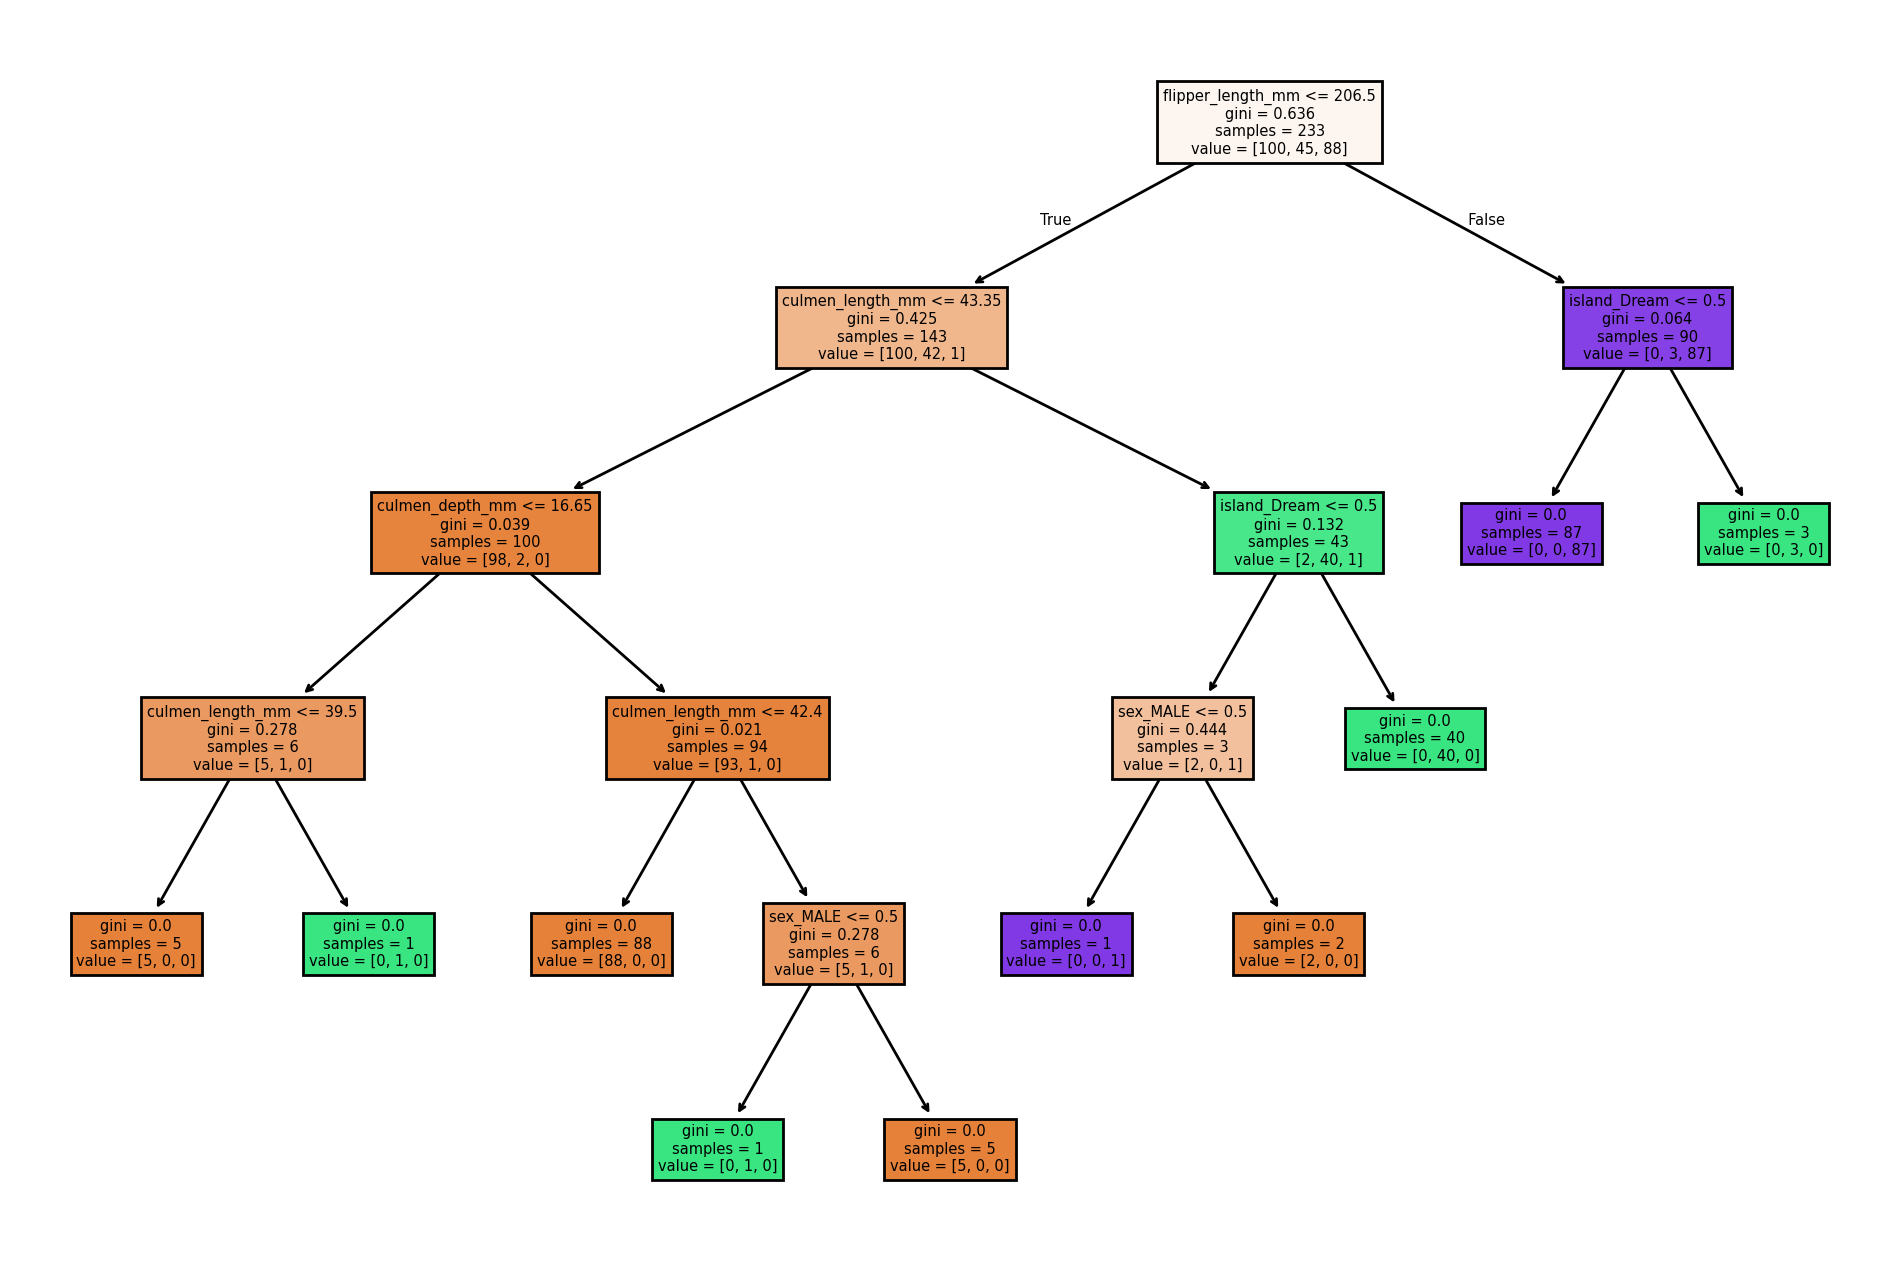

In [42]:
# Az agac

az_agac = DecisionTreeClassifier(max_depth=12) # defaultu 100
az_agac.fit(X_train, y_train)

model_sonuc(az_agac)